In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('C:/Users/hp 15-r032tx/Downloads/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

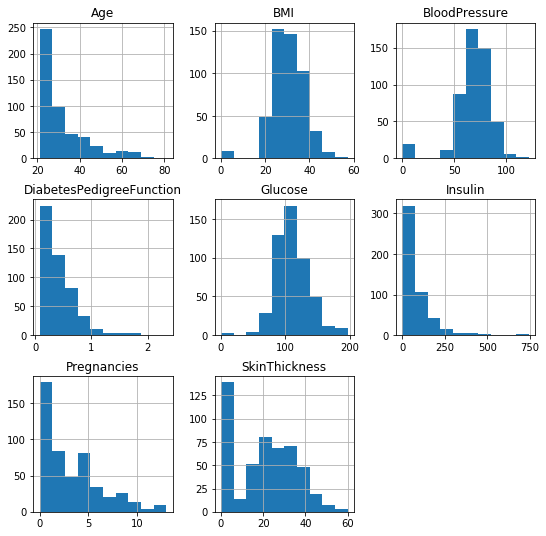

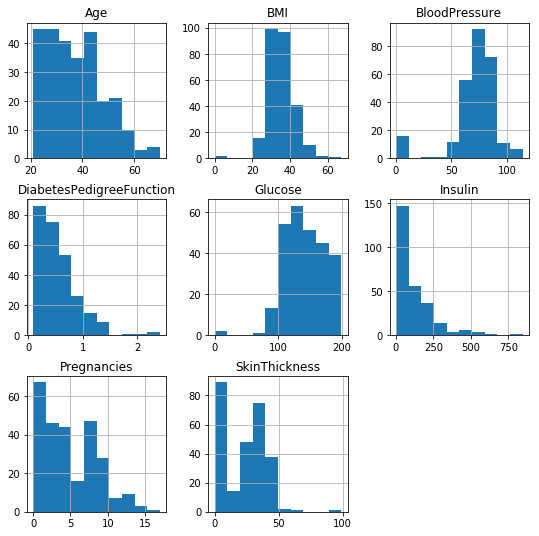

In [6]:
data.groupby('Outcome').hist(figsize=(9,9))

In [7]:
X=data.iloc[:,:-1].values
y=data.iloc[:,8].values

## missing value imputation

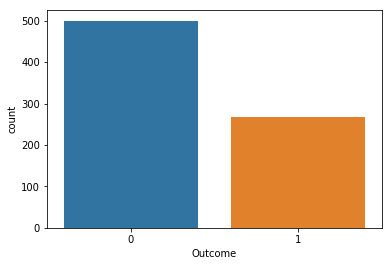

In [8]:
sb.countplot(data['Outcome'],label="Count")

In [9]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


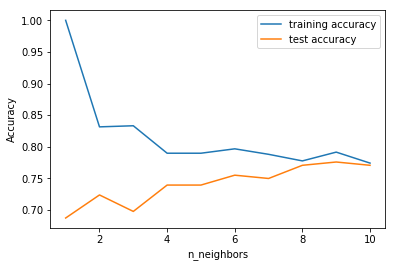

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.loc[:,data.columns!='Outcome'],
                                                 data['Outcome'], stratify=data['Outcome'],
                                                 random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
# try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [11]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set:0.79
Accuracy of K-NN classifier on test set:0.78


In [14]:
#12-9-19
# python script for confusion matrix creation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual=[1,1,0,1,0,0,1,0,0,0,]
predicted=[1,0,0,1,0,0,1,1,1,0]
result=confusion_matrix(actual,predicted)
print('Confusion Matrix:')
print(result)
print('Accuracy Score:',accuracy_score(actual, predicted))
print('Report:')
print(classification_report(actual,predicted))

Confusion Matrix:
[[4 2]
 [1 3]]
Accuracy Score: 0.7
Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

   micro avg       0.70      0.70      0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual=y_test
predict=knn.predict(X_test)
result=confusion_matrix(actual,predict)
print('Confusion Matrix:')
print(result)
print('Accuracy Score:',accuracy_score(actual, predict))
print('Report:')
print(classification_report(actual,predict))

Confusion Matrix:
[[105  20]
 [ 23  44]]
Accuracy Score: 0.7760416666666666
Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

   micro avg       0.78      0.78      0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192



In [22]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
506,0,180,90,26,90,36.5,0.314,35
709,2,93,64,32,160,38.0,0.674,23
257,2,114,68,22,0,28.7,0.092,25
518,13,76,60,0,0,32.8,0.180,41
432,1,80,74,11,60,30.0,0.527,22


In [24]:
len(X_test)

192

In [26]:
knn.predict(X_test[0:5])

array([1, 0, 0, 0, 0], dtype=int64)

In [27]:
knn.predict_proba(X_test[0:5])

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [28]:
y_test.head()

506    1
709    1
257    0
518    0
432    0
Name: Outcome, dtype: int64

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [31]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('receiver operating characteristict(ROC) curve')
    plt.legend()
    plt.show()

In [32]:
probs=knn.predict_proba(X_test)
probs

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.77777778, 0.22222222],
       [0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.77777778, 0.22222222],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.

In [33]:
probs=probs[:,1]
probs

array([0.66666667, 0.33333333, 0.11111111, 0.        , 0.        ,
       0.66666667, 0.66666667, 0.44444444, 0.        , 0.33333333,
       1.        , 0.11111111, 0.77777778, 0.        , 0.44444444,
       0.11111111, 0.22222222, 0.88888889, 0.66666667, 0.66666667,
       0.55555556, 0.22222222, 0.44444444, 0.44444444, 0.44444444,
       0.22222222, 0.55555556, 0.44444444, 0.11111111, 0.11111111,
       0.22222222, 0.33333333, 0.44444444, 0.11111111, 0.44444444,
       0.44444444, 0.44444444, 0.55555556, 0.77777778, 0.22222222,
       0.77777778, 0.        , 0.22222222, 0.11111111, 0.88888889,
       0.        , 0.        , 0.66666667, 0.22222222, 0.66666667,
       0.44444444, 1.        , 0.        , 0.33333333, 0.88888889,
       0.44444444, 0.55555556, 0.44444444, 0.        , 0.77777778,
       0.33333333, 0.44444444, 0.11111111, 0.22222222, 0.77777778,
       0.        , 0.22222222, 0.44444444, 0.33333333, 0.33333333,
       0.11111111, 0.22222222, 0.22222222, 0.        , 0.33333

In [35]:
auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'%auc)

AUC:0.82


In [36]:
fpr,tpr,thresholds=roc_curve(y_test,probs)

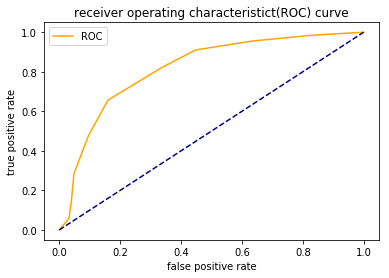

In [37]:
plot_roc_curve(fpr,tpr)